# GUÍA PASO A PASO DE PCA
http://www.ub.edu/stat/docencia/Mates/ejemploACP.PDF

In [1]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# PCA RECURSOS HUMANOS

1. Abrir el archivo
2. Separar las variables dependientes de las independientes (RECURSOS HUMANOS) y normalizarlas
3. Construcción de las matrices de varianza y covarianza
4. Cálculo de los valores propios

In [2]:
#Se importan las librerias necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

1.Abrir el archivo

In [3]:
#Se cargan los archivos limpios sin variables respetidas, imputados los datos y sin atípicos

#SIEMPRE USAR EL ARCHIVO TOTALULIMPIO2 QUE ES EL DE LOS DATOS LIMPIOS

total=pd.read_excel("TOTALULIMPIO2.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898,11,1810,2008,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900,3525900,343423.189677,79.846659,912761,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904,11,1810,2008,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411,296411,9406.000000,79.846659,122106,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912,11,1810,2008,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496,1594496,3200.000000,46.000000,366562,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913,11,1741,2008,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200,166200,-2000.000000,79.846659,92868,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459,8,1410,2016,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356,1290356,11182.000000,54.000000,790408,618268.0,5.155038e+06,4.996960e+06,1100444.0
11636,987465,8,1410,2016,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414,3679414,343423.189677,8.000000,1476328,2164604.0,5.155038e+06,4.996960e+06,3300208.0
11637,987467,8,1410,2016,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225,15550083,503083.000000,400.000000,7454626,6940062.0,5.155038e+06,1.608454e+06,15443532.0
11638,987483,8,1410,2016,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882,1284882,343423.189677,18.000000,835716,421689.0,5.155038e+06,1.717450e+05,1180126.0


2.Separar las variables dependientes de las independientes (RECURSOS HUMANOS) y normalizarlas

In [9]:
variables = ['SOCIOS','PERMANENTE','APRENDIZ','PROD_NAL','PROD_EXT','OBRERO','ADM','TOTPERSONAL','TEMPORALDIRECTO','VENTAS']
# Separando los Recursos humanos (Varibles independientes)
X=total.loc[:,variables].values 
# Separando el objetivo que es ventas (Variable dependiente)
y=total.loc [:, ['VENTAS']].values 

In [10]:
x_std= StandardScaler().fit_transform(X)

In [11]:
recursosh = pd.DataFrame(data = X, columns = variables).head(10295)
recursosh

,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,ADM,TOTPERSONAL,TEMPORALDIRECTO,VENTAS
0,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,1.000000,13.0,79.846659,3460300.0
1,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,6.000000,9.0,79.846659,296411.0
2,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,5.000000,36.0,46.000000,1597520.0
3,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,19.714668,5.0,79.846659,231480.0
...,...,...,...,...,...,...,...,...,...,...
10291,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,19.000000,46.0,54.000000,1100444.0
10292,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,17.000000,46.0,8.000000,3300208.0
10293,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,34.000000,303.0,400.000000,15443532.0
10294,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,10.000000,21.0,18.000000,1180126.0


In [12]:
#No hay datos perdidos pues se esta utilizando el archivo de los datos limpios

recursosh.isnull().sum() # Saber si hay casos con NA
recursosh.dropna(how="all", inplace=True) # Eliminar las observaciones con NA
recursosh.columns

Index(['SOCIOS', 'PERMANENTE', 'APRENDIZ', 'PROD_NAL', 'PROD_EXT', 'OBRERO',
       'ADM', 'TOTPERSONAL', 'TEMPORALDIRECTO', 'VENTAS'],
      dtype='object')

In [13]:
x=recursosh.drop("VENTAS",axis = 1) #Se elimina la variable ventas pues X=Recursos Humanos
y=recursosh["VENTAS"]  #Y=Ventas
names=recursosh.columns
X_std= StandardScaler().fit_transform(x)

<Figure size 432x288 with 0 Axes>

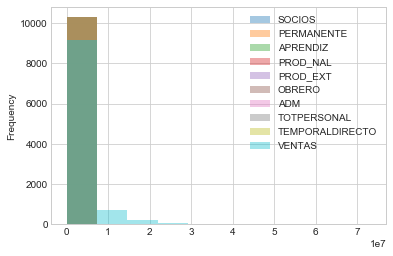

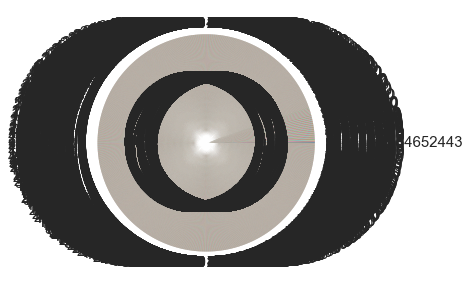

In [9]:
plt.figure("Histograma")
recursosh.plot.hist(alpha=0.4)
plt.figure("Gráfico de pie",figsize=(5,5))
recursosh.VENTAS.value_counts().plot(kind="pie",autopct='%1.1f%%', fontsize=15)
plt.show()

3.Construcción de las matrices de varianza y covarianza 

Para que se pueda realizar el PCA, es necesario que las variables presenten factores comunes. Es decir, que estén muy correlacionadas entre sí. Los coeficientes de la matriz de correlaciones deben ser grandes en valor absoluto. 

In [9]:
#INTENTAR EJECUTAR ESTE CÓDIGO

! pip install factor_analyzer

SI NO FUNCIONAN LAS DOS OPCIONES ANTERIORES INTENTAR POR FAVOR DESCARGAR Y EJECUTAR factor_analyzer DESDE ESTE ENLACE https://anaconda.org/desilinguist/factor_analyzer/files

In [59]:
#EN CASO DE FNCIONAR ALGUNA DE LAS TRES OPCIONES ANTERIORES EJECUTAR ESTA LÍNEA

import logging
import warnings

from factor_analyzer import Rotator
from scipy.stats import chi2
from scipy.optimize import minimize

from factor_analyzer.rotator import Rotator
from factor_analyzer.rotator import POSSIBLE_ROTATIONS, OBLIQUE_ROTATIONS

In [61]:
# Matriz de covarianza

mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

In [84]:
def covariance_to_correlation(cov_mat):
    """
    This is a port of the R `cov2cor` function.

    Parameters
    ----------
    m : numpy array
        The covariance matrix.

    Returns
    -------
    retval : numpy array
        The cross-correlation matrix.

    Raises
    ------
    ValueError
        If the input matrix is not square.
    """

    # make sure the matrix is square
    numrows, numcols = cov_mat.shape
    if not numrows == numcols:
        raise ValueError('Input matrix must be square')

    Is = np.sqrt(1 / np.diag(cov_mat))
    retval = Is * cov_mat * np.repeat(Is, numrows).reshape(numrows, numrows)
    np.fill_diagonal(retval, 1.0)
    return retval



def partial_correlations(x):
    """
    This is a python port of the `pcor` function implemented in
    the `ppcor` R package, which computes partial correlations
    of each pair of variables in the given data frame `data`,
    excluding all other variables.

    Parameters
    ----------
    data : pd.DataFrame
        Data frame containing the feature values.

    Returns
    -------
    df_pcor : pd.DataFrame
        Data frame containing the partial correlations of of each
        pair of variables in the given data frame `df`,
        excluding all other variables.
    """
    numrows, numcols = x.shape
    df_cov = cov_mat
    columns = recursosh.columns

    # return a matrix of nans if the number of columns is
    # greater than the number of rows. When the ncol == nrows
    # we get the degenerate matrix with 1 only. It is not meaningful
    # to compute partial correlations when ncol > nrows.

    # create empty array for when we cannot compute the
    # matrix inversion
    empty_array = np.empty((len(columns), len(columns)))
    empty_array[:] = np.nan
    if numcols > numrows:
        icvx = empty_array
    else:
        # we also return nans if there is singularity in the data
        # (e.g. all human scores are the same)
        try:
            icvx = np.linalg.inv(df_cov)
        except np.linalg.LinAlgError:
            icvx = empty_array
    pcor = -1 * covariance_to_correlation(icvx)
    np.fill_diagonal(pcor, 1.0)
    df_pcor = pd.DataFrame(pcor, columns=columns, index=columns)
    return df_pcor



def calculate_kmo(x):
    """
    Calculate the Kaiser-Meyer-Olkin criterion
    for items and overall. This statistic represents
    the degree to which each observed variable is
    predicted, without error, by the other variables
    in the dataset. In general, a KMO < 0.6 is considered
    inadequate.

    Parameters
    ----------
    data : pd.DataFrame
        The data frame from which to calculate KMOs.

    Returns
    -------
    kmo_per_variable : pd.DataFrame
        The KMO score per item.
    kmo_total : float
        The KMO score overall.
    """

    # calculate the partial correlations
    partial_corr = partial_correlations(x)
    partial_corr = partial_corr.values

    # calcualte the pair-wise correlations
    corMat=np.asarray(cov_mat)

    # fill matrix diagonals with zeros
    # and square all elements
    np.fill_diagonal(corMat, 0)
    np.fill_diagonal(partial_corr, 0)

    partial_corr = partial_corr**2
    corMat = corMat**2

    # calculate KMO per item
    partial_corr_sum = partial_corr.sum(0)
    corMat_sum = corMat.sum(0)
    kmo_per_item = corMat_sum / (corMat_sum + partial_corr_sum)
    kmo_per_item = pd.DataFrame(kmo_per_item,
                                index=recursosh.columns,
                                columns=['KMO'])

    # calculate KMO overall
    corMat_sum_total = corMat.sum()
    partial_corr_sum_total = partial_corr.sum()
    kmo_total = corMat_sum_total / (corMat_sum_total + partial_corr_sum_total)
    return kmo_per_item, kmo_total

In [85]:
calculate_kmo(X)

C:\Users\Invitado\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt


(                 KMO
 SOCIOS           NaN
 PERMANENTE       NaN
 APRENDIZ         NaN
 PROD_NAL         NaN
 PROD_EXT         NaN
 OBRERO           NaN
 ADM              NaN
 TOTPERSONAL      NaN
 TEMPORALDIRECTO  NaN, nan)

In [83]:
def test_calculate_kmo (): 
  
  expected_overall = 0.81498469767761361 
  
  expected_by_item = pd.DataFrame (X, columns = [ ' KMO ' ], 
  índice = índice) 
  (kmo_by_item, 
  kmo_overall) = calcular_kmo (X) 
  print (calcular_kmo (X) )


0,90 > KMO Muy bueno

0,90 > KMO > 0,80 Bueno

0,80 > KMO > 0,70 Aceptable

0,70 > KMO > 0,60 Mediocre o regular

0,60 > KMO > 0,50 Malo

0,50 > KMO Inaceptable o muy malo3

In [14]:
# Matriz de covarianza

mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

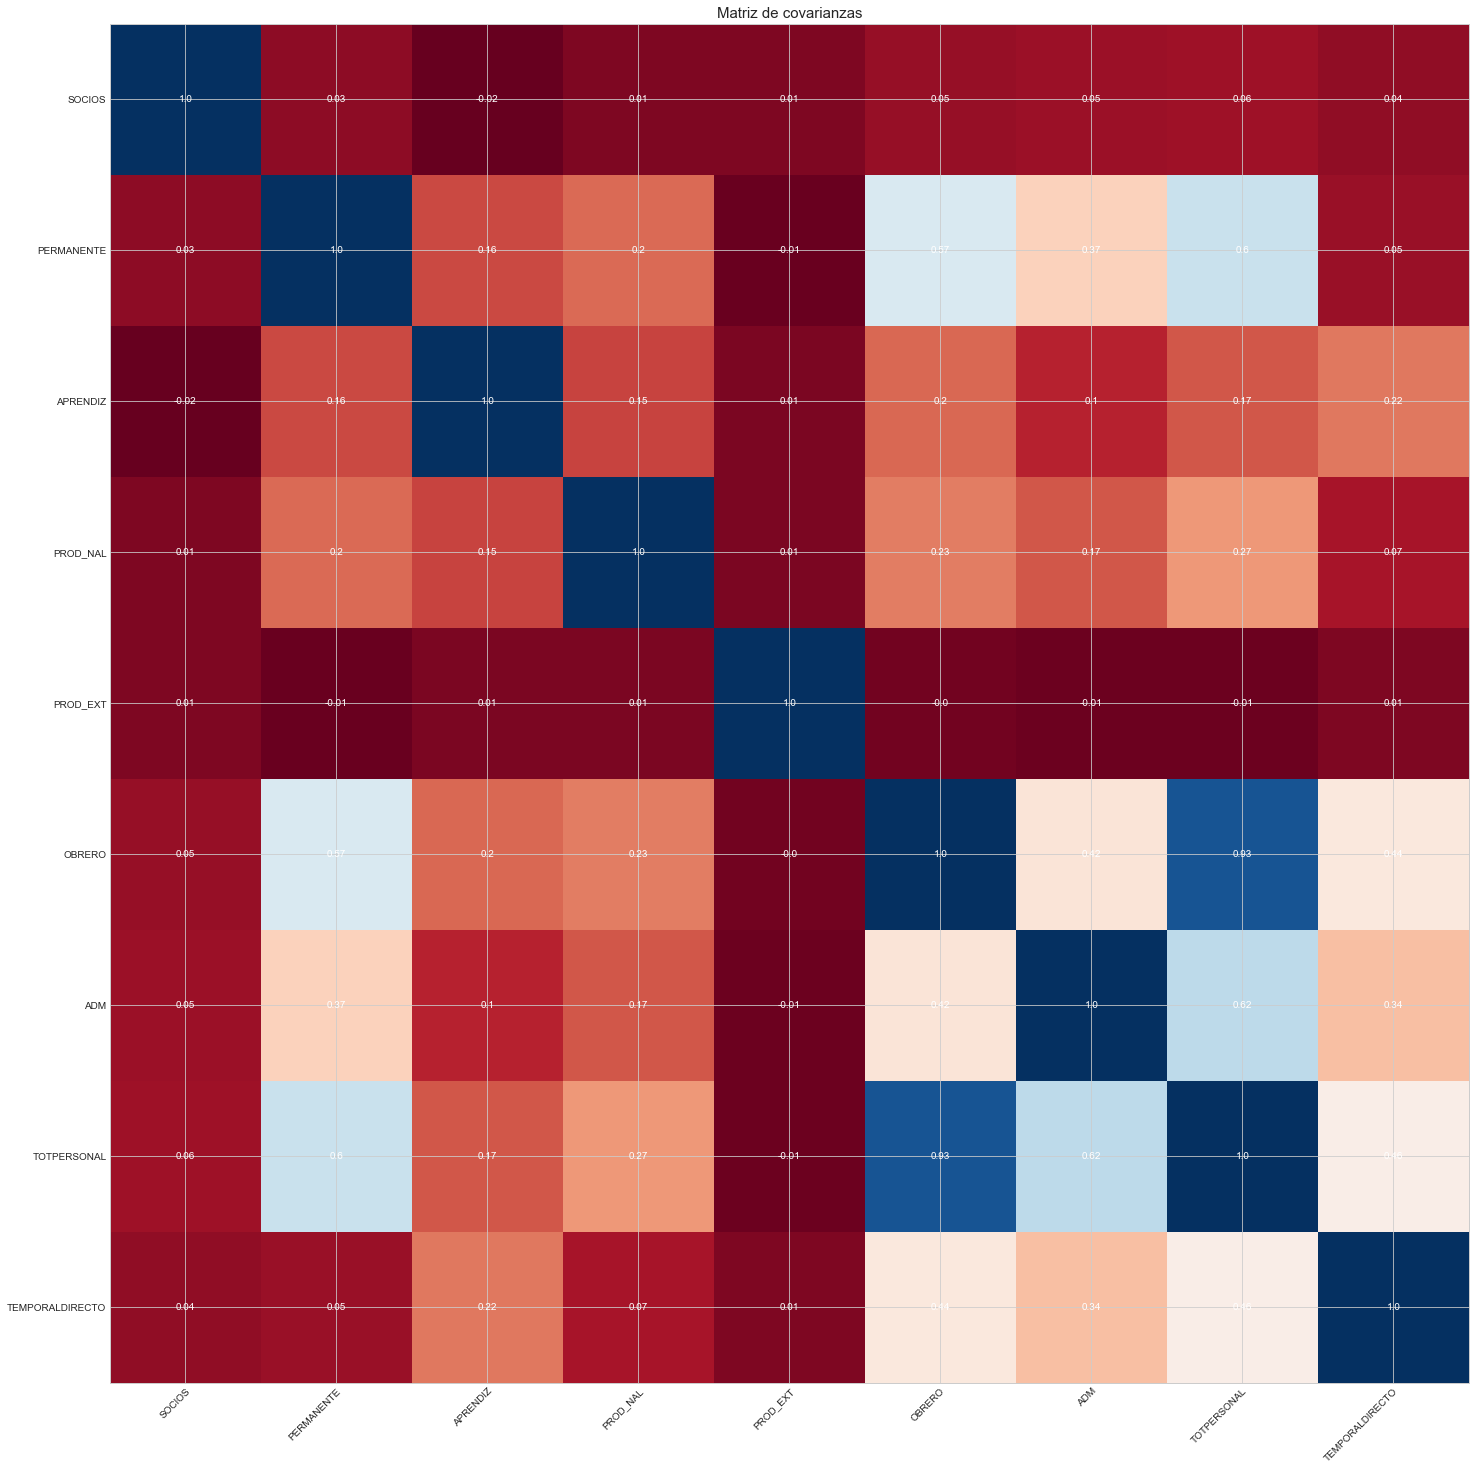

In [15]:
import matplotlib.pyplot as plt
#Gráficar en un mapa de calor las covarianzas

corMat=np.asarray(cov_mat)

fig, ax = plt.subplots(figsize=(25,25)) #Figsize para aumentar el tamaño
im = ax.imshow(corMat,cmap="RdBu")

# Mostrar las etiquetas de las variables
ax.set_xticks(np.arange(len(names)-1))
ax.set_yticks(np.arange(len(names)-1))
# Asignar los nombres a las etiquetas
ax.set_xticklabels(names[:9])
ax.set_yticklabels(names[:9])

# Rotar los nombres
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop para asignar los valores de las correlaciones en el mapa de calor
for i in range(len(names)-1):
    for j in range(len(names)-1):
        text = ax.text(j, i, round(corMat[i, j],2),
                       ha="center", va="center", color="w")

plt.title("Matriz de covarianzas", fontdict={"fontsize":15}) 
# o de correlación si los datos están normalizados
plt.show()

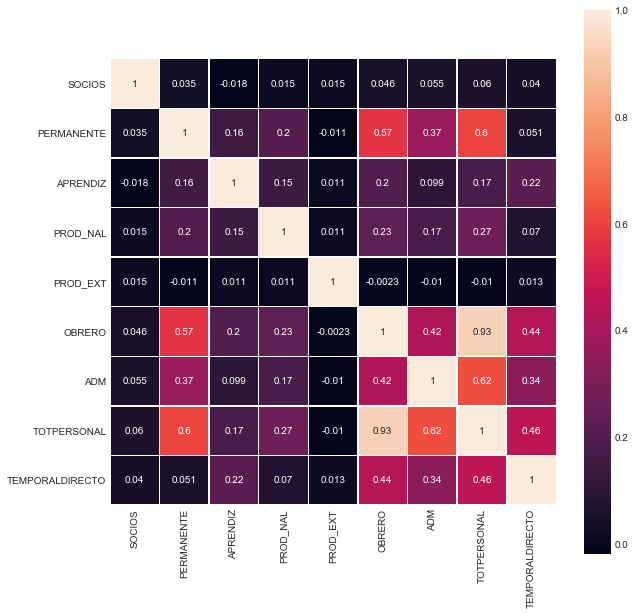

In [16]:
#Otra forma de visualizar la Matriz de covarianzas #ESTA ES MÁS BONITA
plt.subplots(figsize=(10,10))
sns.heatmap(x.corr(), square=True, annot=True, linewidths =0.4)

4.Cálculo de los valores propios

In [24]:
#KAREN da el mismo resultado utilizando CorMat o utilizando x.corr
eigen_value, eigen_vector =np.linalg.eig(x.corr()) 


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_value[i]), eigen_vector[:,i]) for i in range(len(eigen_value))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Valores propios ordenados:')
for i in eig_pairs:
    print(i[0])

Valores propios ordenados:
3.1876843756283044
1.0414847360077744
1.0243439893130468
0.9995994955918651
0.9493091210429822
0.7983363344767409
0.6127835274313836
0.34889600915326385
0.037562411354635325


In [62]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_value[i]), eigen_vector[:,i]) for i in range(len(eigen_value))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

print('Valores propios ordenados con su vector propio:')
eig_pairs

Valores propios ordenados con su vector propio:


[(3.1876843756283044,
  array([-0.04630956, -0.38253133, -0.17692546, -0.20711185,  0.00267837,
         -0.50062809, -0.38645382, -0.53325179, -0.30493865])),
 (1.0414847360077744,
  array([-0.34644811, -0.31625259,  0.66381748,  0.05723121,  0.3407293 ,
         -0.05919431, -0.10593858, -0.10363628,  0.44098194])),
 (1.0243439893130468,
  array([-0.69622877,  0.23049855,  0.15385466,  0.33453735, -0.44856557,
         -0.00322052, -0.1003424 , -0.01852351, -0.33899302])),
 (0.9995994955918651,
  array([-0.08659758, -0.25377257, -0.01843716, -0.48242684, -0.7082492 ,
          0.02767939,  0.10547964,  0.03422261,  0.42466991])),
 (0.9493091210429822,
  array([-0.61103518,  0.05205829, -0.45142546, -0.44220334,  0.42364741,
          0.10690609,  0.13437969,  0.11803219,  0.04125131])),
 (0.7983363344767409,
  array([ 1.09341560e-01,  4.40518142e-01,  4.88564487e-01, -6.35319831e-01,
          3.33862796e-02,  9.49985305e-02, -2.07157129e-01, -1.66868832e-04,
         -3.14019388e-01

In [45]:
eigen_value

array([3.18768438, 0.03756241, 0.34889601, 0.61278353, 0.79833633,
       0.94930912, 1.04148474, 1.02434399, 0.9995995 ])

In [44]:
eigen_vector #FALTA ORDENAR

array([[-4.63095560e-02, -3.69262300e-03, -7.89247851e-03,
         1.41422348e-02,  1.09341560e-01, -6.11035181e-01,
        -3.46448109e-01, -6.96228765e-01, -8.65975759e-02],
       [-3.82531332e-01, -2.54750511e-02,  6.62350890e-01,
        -2.18207231e-05,  4.40518142e-01,  5.20582947e-02,
        -3.16252588e-01,  2.30498548e-01, -2.53772574e-01],
       [-1.76925463e-01,  2.14549116e-02, -1.34470568e-01,
        -2.07387819e-01,  4.88564487e-01, -4.51425457e-01,
         6.63817475e-01,  1.53854656e-01, -1.84371606e-02],
       [-2.07111855e-01, -2.58951744e-02,  6.27580553e-02,
         7.34449667e-02, -6.35319831e-01, -4.42203336e-01,
         5.72312069e-02,  3.34537347e-01, -4.82426842e-01],
       [ 2.67836694e-03,  4.46585039e-03, -6.35271713e-03,
        -2.04033731e-02,  3.33862796e-02,  4.23647407e-01,
         3.40729300e-01, -4.48565574e-01, -7.08249200e-01],
       [-5.00628091e-01, -6.22606297e-01, -4.01185220e-01,
         4.19582187e-01,  9.49985305e-02,  1.069060

In [50]:
Tot = sum(eigen_value)
var_exp = [(i / 9)*100 for i in sorted(eigen_value, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Varianza ordenada:')
var_exp
#Varianza ordenada

Varianza ordenada:


[35.41871528475894,
 11.572052622308604,
 11.381599881256076,
 11.106661062131835,
 10.547879122699802,
 8.870403716408232,
 6.808705860348708,
 3.8766223239251536,
 0.4173601261626147]

In [37]:
print('Varianza acumulada:')
cum_var_exp

Varianza acumulada:


array([ 35.41871528,  46.99076791,  58.37236779,  69.47902885,
        80.02690797,  88.89731169,  95.70601755,  99.58263987,
       100.        ])

Gráfico de la varianza asociada a cada factor. Se utiliza para determinar cuántos factores deben retenerse. Típicamente el gráfico muestra la clara ruptura entre la pronunciada pendiente de los factores más importantes. 

http://halweb.uc3m.es/esp/Personal/personas/jmmarin/esp/AMult/tema3am.pdf

PARA ESTA GRÁFICA LOS VALORES PROPIOS DEBEN ESTAR ORDENADOS DE MAYOR A MENOR O DE MAYOR A MENOR VARIANZA EXPLICADA

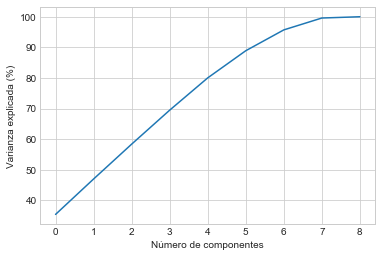

In [40]:
#El nuúmero de componentes esta determinado por el punto donde se encuentra una clara ruptura o punto de inflexión

plt.plot(cum_var_exp,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada (%)")
plt.show()

3.1876843756283044
1.0414847360077744
1.0243439893130468
0.9995994955918651
0.9493091210429822
0.7983363344767409
0.6127835274313836
0.34889600915326385
0.037562411354635325


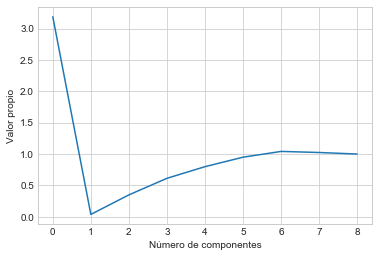

In [43]:
plt.plot(eigen_value,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Valor propio")
plt.show()

#ESTA GRÁFICA ESTA MAL PORQUE LOS VALORES PROPIOS DEBEN ESTAR ORDENADOS DE MAYOR A MENOR

Realizando la gráfica con los valores propios ordenados de mayor a menor se obtiene:

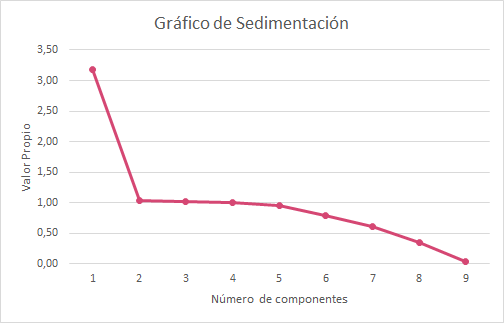

Analizando la gráfica Valor propio vs Número de componentes se muestra una clara ruptura en la segunda componente sin embargo los dos primeros componentes sólo explican el 46,9% de la información por lo que se deciden tomar las primeras 5 componentes cuya varianza acumulada es del 80,02%

En el caso de Python se toman las componentes 1, 7, 8, 9 Y 6

5.Proyección de los datos

In [ ]:
#Creo que no se pueden proyectar los datos

for name in ('11002090', '1657388', '8600884'):
    plt.scatter(x=Y[y==name,0],y=Y[y==name,1],VENTAS=name)
plt.legend()
plt.show()

In [15]:
M_w=eigen_vector[:,0:5]
Y=X_std.dot(M_w) # Nuevos Y

# PCA

In [16]:
from sklearn.decomposition import PCA

sklearn_PCA= PCA(n_components=5)
Y_1=sklearn_PCA.fit_transform(X_std)

Al analizar las componentes se evidencia que sólo la cuarta componente se enfoca en el talento humano del área administrativa, mientras las otras cuatro componentes hacen referencia al área de producción. La primer componente se etiqueta como personal de producción por sus valores altos en las variables de empleados de producción nacionales y extranjeros, la segunda componente se refiere a las trabajadores con contrato a término fijo que laboran en el área de producción, la tercer componente corresponde al personal de producción que cuentan con un contrato de trabajo a término indefinido, la cuarta componente se denomina aprendices y administrativos por sus valores altos en las variables Aprendices-pasantes y Personal administrativo y la quinta componente hace referencia a las personas colombianas vinculadas directamente a tareas productivas.

In [17]:
PCArecursosh = pd.DataFrame(data = Y_1, columns = ['PRODUCCION', 'PRODUCCION_TEMP','PRODUCCION_PERM', 'APRENDIZ_Y_ADM','PRODUCCION_COL'])
PCArecursosh.head(10295)

,PRODUCCION,PRODUCCION_TEMP,PRODUCCION_PERM,APRENDIZ_Y_ADM,PRODUCCION_COL
0,-1.185089,-0.695942,-0.637784,0.736318,-0.068403
1,-0.725312,-0.382473,-0.774458,-0.156469,1.243354
2,-0.449776,0.091581,-0.206241,0.258389,-0.293520
3,-0.481104,-0.877073,0.919950,0.696528,-1.466840
...,...,...,...,...,...
10291,0.198137,1.136218,-0.613714,-0.518668,0.457986
10292,-0.305868,1.438557,0.275241,-0.766234,-0.311770
10293,7.496782,-4.366122,-1.954654,3.038521,0.246866
10294,-1.291353,0.227193,1.392686,-0.312268,-1.331324


In [18]:
establecimiento=total[['VENTAS']].head(10295)
establecimiento

,VENTAS
0,3460300.0
1,296411.0
2,1597520.0
3,231480.0
...,...
11635,1100444.0
11636,3300208.0
11637,15443532.0
11638,1180126.0


In [19]:
PCArecursosh.reset_index(drop=True, inplace=True) 
establecimiento.reset_index(drop=True, inplace=True) 
PCA = pd.concat([establecimiento,PCArecursosh], axis=1)
PCA

,VENTAS,PRODUCCION,PRODUCCION_TEMP,PRODUCCION_PERM,APRENDIZ_Y_ADM,PRODUCCION_COL
0,3460300.0,-1.185089,-0.695942,-0.637784,0.736318,-0.068403
1,296411.0,-0.725312,-0.382473,-0.774458,-0.156469,1.243354
2,1597520.0,-0.449776,0.091581,-0.206241,0.258389,-0.293520
3,231480.0,-0.481104,-0.877073,0.919950,0.696528,-1.466840
...,...,...,...,...,...,...
10291,1100444.0,0.198137,1.136218,-0.613714,-0.518668,0.457986
10292,3300208.0,-0.305868,1.438557,0.275241,-0.766234,-0.311770
10293,15443532.0,7.496782,-4.366122,-1.954654,3.038521,0.246866
10294,1180126.0,-1.291353,0.227193,1.392686,-0.312268,-1.331324


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


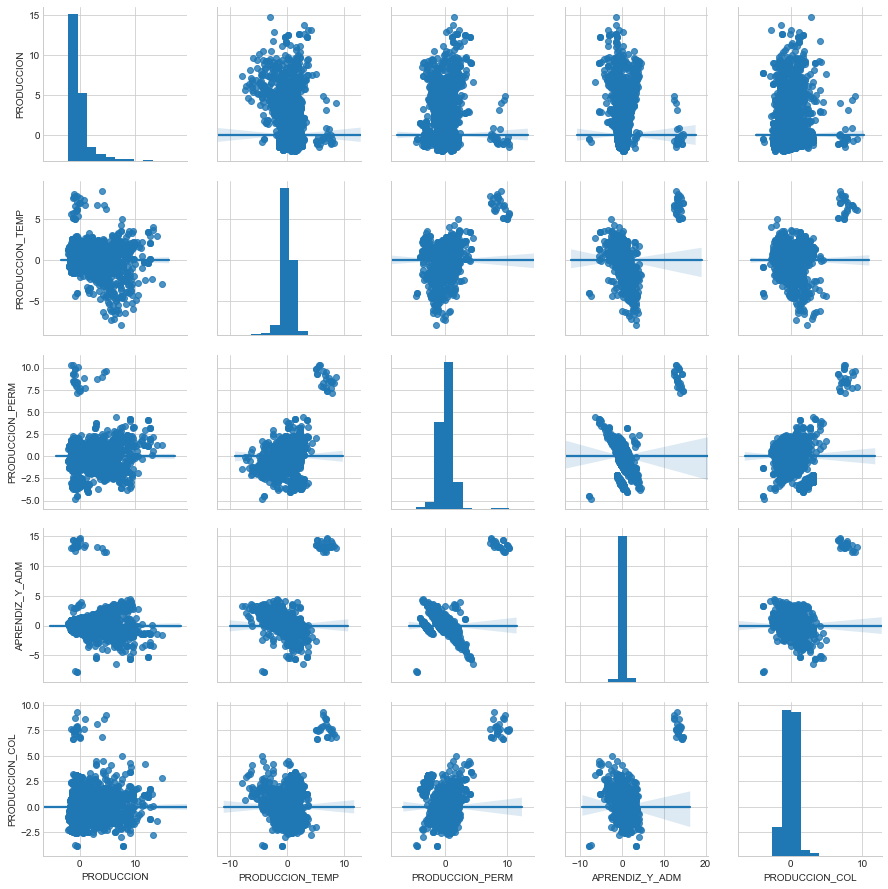

In [20]:
b = sns.pairplot(PCA, vars=["PRODUCCION","PRODUCCION_TEMP","PRODUCCION_PERM","APRENDIZ_Y_ADM","PRODUCCION_COL"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables

In [110]:
print(sklearn_PCA.explained_variance_ratio_) 

[0.35418715 0.11572053 0.113816   0.11106661 0.10547879]
